# Redes Neuronales Artificiales - ANN

## Introducción

Una de las premisas fundamentales de la inteligencia artificial, es la construcción de máquinas que puedan desempeñar tareas que requieren inteligencia humana. El cerebro humano es sorprendente cuando se trata de aprender nuevas cosas. ¿Por qué no usar el modelo del cerebro humano para construir una máquina?. Una red neuronal artificial es un modelo diseñado para simular el proceso de apredizaje del cerebro humano.

Las redes neuronales artificiales se diseñan de tal manera que puedan identificar los patrones subyacentes en los datos y aprender de llos. Pueden utilizarse en varias tareas como clasificación, regresión, segmentación, entre otras. Necesitamos convertir cualquier dato dado es  forma numérica antes de alimentar la red neuronal con el. POr ejemplo, usualmente tenemos diferentes tipos de datos como visuales, textuales, series de tiempo, entre otras. Necesitamos entoces pensar en cómo representar estos problemas de tal forma que puedan ser entendidos por las ANN.

### Construcción de una red neuronal

El proceso de aprendizaje human es jerárquico. Tenemos varias etapas en la red neuronal de nuestro cerebro y cada etapa corresponde un una  una granularidad diferente. Algunas etapas aprenden cosas simples y algunas etapas aprenden cosas más complejas. Consideremos un ejemplo de reconocimiento visual de un objeto. Cuando miramos una caja, la primera etapa identifica cosas simples como esquinas y bordes. La siguiente etapa identifica la forma genérica y la etapa posterior que identifica qué tipo de objeto es. Este proceso difiere para diferentes tareas, ¡pero se entiende la idea! Al construir esta jerarquía, nuestro cerebro humano separa rápidamente los conceptos e identifica el objeto dado.

Para simular el proceso de aprendizaje de un cerebro humano, una ANN se construye usando capas de neuronas. Estas neuronas están inspiradas en las neuronas biológicas. Cada capa se una ANN es un conjunto independiente de neuronas. Cada neurona es una capa está conectada a neuronas en la capa adyacente.

![ANN](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

### Entrenamiento de una red neuronal

Si estamos lidiando cun una entrada $N-dimensional$, la capa de entrada debe contener $N$ neuronas. Si tenemos $M$ clases distintas en nuestro conjunto de entrenamientos, entonces la capa de salida debe contener $M$ neuronas. Las capas entre las capas de salida y de entrada se llaman **capas ocultas**. Una red neuronal simple consistirá de una par de capas, mientras una red neuronal profunda consistirá de muchas  capas.

Considere el caso donde queremos utilizar una red neuronal para clasificar unos datos determinados. El pirmer paso es reunir un conjunto apropiado de entrenamiento y etiquetarlos. Cada neurona actúa como una función simple y la red neuronal se entrena a sí misma hasta que el error esté por debajo de cierto valor. El error es básicamente la difreencia entre la salida predecida y la salida actual. Basada en qué tan grande es el error, la red neuronal se ajusta a sí misma y se re-entrena hasta que esté cerca de la solución.

La libraría que se utilizará para el desarrollo de los códigos se llama NeuroLab http://pythonhosted.org/neurolab/. Para la instalación se debe ejecutar el comando en el promp de Anaconda.

$ pip install neurolab

ó

$ pip3 install neurolab

## Construcción de un clasificador  basado en Perceptron

Un **Perceptron** es el componente básico de una ANN. Es un modelo de una ANN de una sola capa que toma las entradas, realiza cálculos sobre ellas y luego produce una salida. Utiliza una función lineal simple para tomar la decisión. Digamos que estamos tratando con un punto de datos de entrada $N-dimensional$. Un Perceptron calcula la suma ponderada de esos $N$ números y luego agrega una constante para producir la salida. La constante se llama sesgo (bias) de la neurona. Es notable observar que estos perceptrones simples se utilizan para diseñar redes neuronales profundas muy complejas. Veamos cómo construir un clasificador basado en Perceptron usando NeuroLab. 

![perceptron](https://upload.wikimedia.org/wikipedia/commons/b/b0/Perceptr%C3%B3n_5_unidades.svg)

In [4]:
#importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [6]:
#cargamos los datos del archivo. Consisten en dos características y una etiqueta separados por espacio
datos = np.loadtxt('data_perceptron.txt')

#los separamos en datos y etiquetas
X = datos[:,:2]
etiquetas = datos[:,2]
print(etiquetas)
#reordenamos las etiquetas para que queden en formato columna
y = datos[:,2].reshape((datos.shape[0],1)) 
print(y)

[ 0.  0.  0.  1.  1.]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]


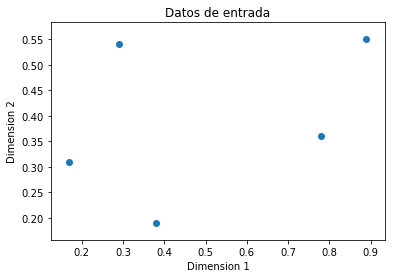

In [12]:
#graficamos los datos de entrada
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Datos de entrada')
plt.show()
#definimos los valores máximos y mínimos que puede tomar cada dimensión
dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1
#Dado que los datos están seprados en dos clases, solo necesitamos un bit
#para representar la salida. Por tanto la capa de salida solo tendrá una neurona

#Número de neuronas en la capa de salida
num_output = y.shape[1]

#tenemos un conjunto de datos de dos dimensiones, definimos un perceptron
# con dos neuronas a la entrada y le asignamos una a cada dimensión
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1,dim2], num_output)


In [14]:
#entrenamos el perceptron con el conjunto de entrenamiento 
# lr es la tasa de aprendizaje, e indica que tan rápico o que tan lento se actualizan los pasos
#epochs indica el número de pasadas por todo el conjunto de entrenamiento
progreso_error = perceptron.train(X, y, epochs=100, show=20, lr=0.03)

The goal of learning is reached


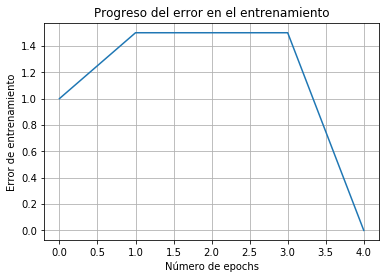

In [15]:
#graficamos el progreso de entrenamiento usando la métrica del error
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Número de epochs') 
plt.ylabel('Error de entrenamiento') 
plt.title('Progreso del error en el entrenamiento') 
plt.grid()
plt.show()

# Construcción  de una red neuronal de una sola capa

Un perceptron es un buen inicio, pero no puede hacer mucho. El siguiente paso es tener un conjunto de neuronas que actúan como una unidad para ver que podemos conseguir. Vamos a crear un red neuronal sencilla, que consiste en neuronas independientes actuando sobre los datos de entrada para producir una salida.

In [16]:
#importamos las librerías necesarias
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl

In [18]:
#en esta ocasión los datos de entrada tienen cuatro puntos. Los dos
#primero son las características y los otros dos conforman la etiquetan
#se utilizan dos números porque tenemos cuatro clases, por tanto se
#requieren dos bits para representar las etiquetas
datos = np.loadtxt('data_simple_nn.txt')
#separamos los datos y las etiquetas
X = datos[:,0:2]
y = datos[:,2:]

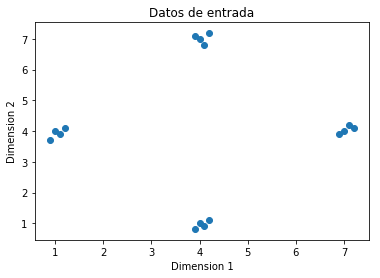

In [21]:
#graficamos los datos de entrada
plt.figure() 
plt.scatter(X[:,0], X[:,1]) 
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.title('Datos de entrada')
plt.show()

In [22]:
#extraemos los mínimos y los máximos de cada dimensión
dim1_min, dim1_max = X[:,0].min(), X[:,0].max() 
dim2_min, dim2_max = X[:,1].min(), X[:,1].max()

In [23]:
#definimos el número de neuronas en la capa de salida
num_output = y.shape[1]
print(num_output)

2


In [24]:
#definimos la red neuronal a partir de los parámetros anteriores
dim1 = [dim1_min, dim1_max] 
dim2 = [dim2_min, dim2_max] 
nn = nl.net.newp([dim1, dim2], num_output)

In [25]:
#entrenamos la red neuronal usando los datos de entrenamiento
progreso_error = nn.train(X, y, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


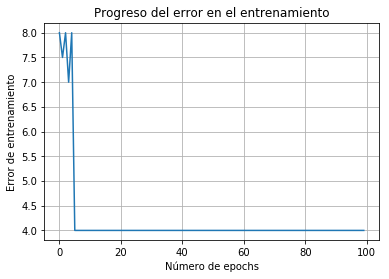

In [26]:
#graficamos el progreso de entrenamiento usando la métrica del error
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Número de epochs') 
plt.ylabel('Error de entrenamiento') 
plt.title('Progreso del error en el entrenamiento') 
plt.grid()
plt.show()

In [27]:
#definimos algunos datos de validación.
print('\nDatos de validación')
data_test = [[0.4, 4.3], [4.4, 0.6],[4.7, 8.1]] 
for item in data_test: 
    print(item, '-->', nn.sim([item])[0])


Datos de validación
[0.4, 4.3] --> [ 0.  0.]
[4.4, 0.6] --> [ 1.  0.]
[4.7, 8.1] --> [ 1.  1.]


# Construcción de una red neuronal multi-capa

Con elf in de obtener un acierto mayor, necesitamos darle  más libertad a la red neuronal; esto significa que una red neuronal necesita más d euna capa para extraer los patrones subyacentes de los datos de entrenamiento. Para este ejercicio utilizaremos la red neuronal como regresor. Camos a generar algunos datos basados en la e ecuación:
$$y = 3x^{2}+5$$

Posteriormente normalizaremos los datos

In [28]:
#importamos las librerías necesarias
import numpy as np 
import matplotlib.pyplot as plt 
import neurolab as nl

In [30]:
#generamos algunos datos de entrenamiento
val_min = -15
val_max = 15
num_datos = 130
x = np.linspace(val_min, val_max, num_datos)
y = (3*x**2)+5
y /= np.linalg.norm(y)

In [31]:
#creamos los datos y las etiquetas
X = x.reshape(num_datos, 1)
y = y.reshape(num_datos, 1)

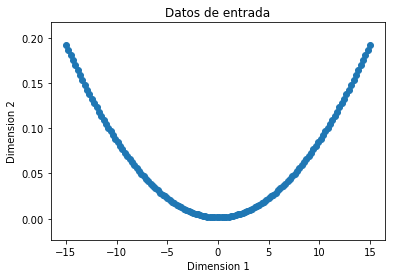

In [34]:
#graficamos los datos de entrada
plt.figure() 
plt.scatter(X, y) 
plt.xlabel('Dimension 1') 
plt.ylabel('Dimension 2') 
plt.title('Datos de entrada')
plt.show()

In [39]:
#definiremos una red neuronal multicapa con dos capas ocultas. Eres libre
#de diseñar una red neuronal de la forma en que prefieras. Para este caso
#tendremos 10 neuronas en la primera capa y 6 neuronas en la segunda
#como nuestra tarea es predecir el valor, la capa de salida tendrá
#una única neurona (feedoforward)
nn = nl.net.newff([[val_min, val_max]], [10, 6, 1])
#establecemos el algoritmo de entrenamiento como gradiente descendiente
nn.trainf = nl.train.train_gd
#entrenamos la red neuronal con los datos generados
progreso_error = nn.train(X, y, epochs = 2000, show =100, goal = 0.01)

Epoch: 100; Error: 0.02708877024382062;
Epoch: 200; Error: 0.019394661619091844;
Epoch: 300; Error: 0.01797808583111709;
Epoch: 400; Error: 0.016948523916372277;
Epoch: 500; Error: 0.01604690863752183;
Epoch: 600; Error: 0.017201251916974605;
Epoch: 700; Error: 0.015936490062722273;
Epoch: 800; Error: 0.014164700600154985;
Epoch: 900; Error: 0.013438495590279785;
Epoch: 1000; Error: 0.012750112881163463;
Epoch: 1100; Error: 0.01334538662751433;
Epoch: 1200; Error: 0.01801403395475137;
Epoch: 1300; Error: 0.011203609541145645;
Epoch: 1400; Error: 0.010594767440227032;
Epoch: 1500; Error: 0.010171849189224216;
Epoch: 1600; Error: 0.05420692098480536;
The goal of learning is reached


In [40]:
#Corremos la red neuronal sobre los datos de entrenamiento
output = nn.sim(X)
y_pred = output.reshape(num_datos)

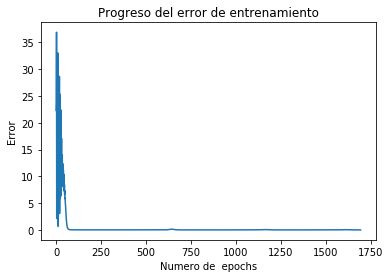

In [41]:
#graficamos el prograos de entrenamiento
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Numero de  epochs') 
plt.ylabel('Error') 
plt.title('Progreso del error de entrenamiento')
plt.show()

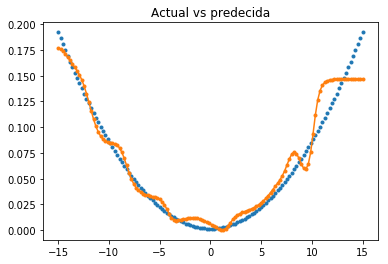

In [48]:
#Graficamos la salida
plt.figure() 
plt.plot(x, y, '.', x, y_pred,'.-') 
plt.title('Actual vs predecida') 
 
plt.show()